In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

In [2]:
# === 1. Завантаження Excel-файлу ===
file_path = 'Коректність відповідей.xlsx'  # заміни шлях, якщо файл в іншій папці
df = pd.read_excel(file_path)

In [3]:
# === 2. Перетворення категорій у числові значення ===
category_to_int = {
    'коректна (повна)': 0,
    'неповна': 1,
    'некоректна': 2
}

In [4]:
numeric_data_chat = df['anwer_estimation_chat_o3_OpenAI'].map(category_to_int).values.reshape(10, 10)
numeric_data_gemini = df['anwer_estimation_gemini_2.5_pro_Google'].map(category_to_int).values.reshape(10, 10)

In [5]:
# === 3. Створення кольорової карти та легенди ===
cmap = ListedColormap(['green', 'yellow', 'red'])

In [6]:
legend_elements = [
    Patch(facecolor='green', label='Коректна (повна)'),
    Patch(facecolor='yellow', label='Неповна'),
    Patch(facecolor='red', label='Некоректна')
]

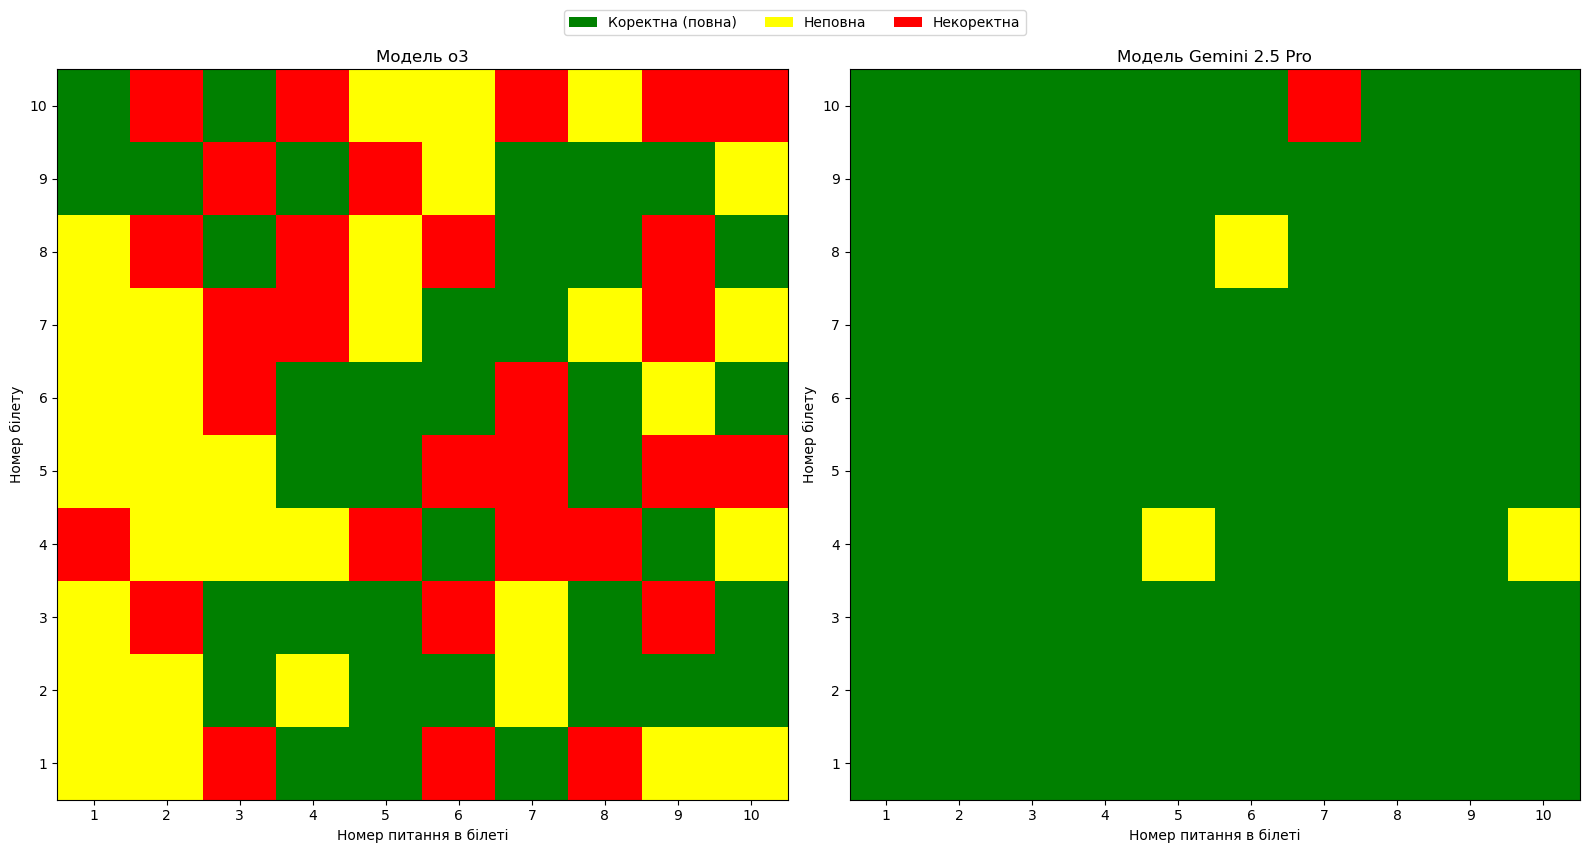

In [13]:
# === 4. Побудова комбінованої теплової карти ===
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Теплова карта Chat O3
axes[0].imshow(numeric_data_chat, cmap=cmap, origin='lower')
axes[0].set_title("Модель о3")
axes[0].set_xlabel("Номер питання в білеті")
axes[0].set_ylabel("Номер білету")
axes[0].set_xticks(np.arange(10))
axes[0].set_yticks(np.arange(10))
axes[0].set_xticklabels(np.arange(1, 11))
axes[0].set_yticklabels(np.arange(1, 11))
axes[0].grid(False)

# Теплова карта Gemini 2.5 Pro
axes[1].imshow(numeric_data_gemini, cmap=cmap, origin='lower')
axes[1].set_title("Модель Gemini 2.5 Pro")
axes[1].set_xlabel("Номер питання в білеті")
axes[1].set_ylabel("Номер білету")
axes[1].set_xticks(np.arange(10))
axes[1].set_yticks(np.arange(10))
axes[1].set_xticklabels(np.arange(1, 11))
axes[1].set_yticklabels(np.arange(1, 11))
axes[1].grid(False)

# Додамо легенду
fig.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()

# Збереження у файл (формати: .png, .pdf, .svg, .jpg тощо)
plt.savefig("heatmap_comparison.png", dpi=300, bbox_inches='tight')  # PNG
# plt.savefig("heatmap_comparison.pdf")  # або PDF

plt.show()